In [1]:
import logging, gensim, bz2
from gensim import corpora, models, similarities, matutils
from collections import defaultdict
import nltk
import pyLDAvis.gensim
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import os
import codecs
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

# Let's retrieve the documents. A document is a set of tweets of a user

In [2]:
setDocs1 = []
allDocuments = []
for file_name in os.listdir("/home/vagrant/shared/Test/1"):
    file = codecs.open("/home/vagrant/shared/Test/1/" + file_name, "r", "utf-8")
    aux = file.read()
    setDocs1.append(aux)
    allDocuments.append(aux)

In [3]:
setDocs2 = []
for file_name in os.listdir("/home/vagrant/shared/Test/2"):
    file = codecs.open("/home/vagrant/shared/Test/2/" + file_name, "r", "utf-8")
    aux = file.read()
    setDocs2.append(aux)
    allDocuments.append(aux)

# Preprocessing

In [4]:
texts = []
tokenizer = RegexpTokenizer(r'\w+')
stoplist_tw=['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','best','really','see','want','nice',
            'while','know']

unigrams = [ w for doc in allDocuments for w in doc if len(w)==1]
bigrams  = [ w for doc in allDocuments for w in doc if len(w)==2]

en_stop  = set(nltk.corpus.stopwords.words("english") + stoplist_tw
                + unigrams + bigrams)
p_stemmer = PorterStemmer()
# loop through document list
for i in allDocuments:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

In [5]:
texts1 = []
tokenizer = RegexpTokenizer(r'\w+')
stoplist_tw=['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','best','really','see','want','nice',
            'while','know']

unigrams = [ w for doc in setDocs1 for w in doc if len(w)==1]
bigrams  = [ w for doc in setDocs1 for w in doc if len(w)==2]

en_stop  = set(nltk.corpus.stopwords.words("english") + stoplist_tw
                + unigrams + bigrams)
p_stemmer = PorterStemmer()
# loop through document list
for i in setDocs1:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts1.append(stemmed_tokens)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts1]

In [6]:
#for i in xrange(len(corpus)):
#    for w in corpus[1]:
#        print dictionary[w[1]]

# LDA Model

In [7]:
lda_model_1 = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=10, alpha=0.001)

In [8]:
for i in xrange(3):
    print i
    for tup in lda_model_1.get_topic_terms(i):
        print dictionary[tup[0]] + ' ' + str(tup[1])

0
obama 0.0172253507016
act 0.00936756710839
state 0.00825441585593
american 0.00825251524686
presid 0.00824831818925
law 0.00711873979099
democrat 0.00600082762528
unit 0.00599477385968
first 0.0048817846139
born 0.00487654384757
1
axiom 0.0186837965099
gödel 0.0186812628839
set 0.0141132011571
system 0.0106747737096
theori 0.00952823965557
logic 0.00839234062559
theorem 0.00839089743425
consist 0.00838959787043
work 0.00724731786927
number 0.00724644985849
2
alonso 0.0286291951355
prix 0.0112315976337
grand 0.0112227054121
start 0.0101495706537
ferrari 0.0101347364276
driver 0.00905763816561
season 0.00905314475014
finish 0.00797228158106
2010 0.00688398956097
vettel 0.00688171274243


In [9]:
#data1 =  pyLDAvis.gensim.prepare(lda_model_1, corpus, dictionary)
#pyLDAvis.display(data1)

# Model 2

In [10]:
texts2 = []
tokenizer = RegexpTokenizer(r'\w+')
stoplist_tw=['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','best','really','see','want','nice',
            'while','know']

unigrams = [ w for doc in setDocs2 for w in doc if len(w)==1]
bigrams  = [ w for doc in setDocs2 for w in doc if len(w)==2]

en_stop  = set(nltk.corpus.stopwords.words("english") + stoplist_tw
                + unigrams + bigrams)
p_stemmer = PorterStemmer()
# loop through document list
for i in setDocs2:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts2.append(stemmed_tokens)
    
# convert tokenized documents into a document-term matrix
corpus2 = [dictionary.doc2bow(text) for text in texts2]

In [15]:
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics=3, id2word = dictionary, passes=10, alpha=0.001)

In [16]:
for i in xrange(3):
    print i
    for tup in lda_model_2.get_topic_terms(i):
        print dictionary[tup[0]] + ' ' + str(tup[1])

0
ture 0.028906541809
comput 0.0212119822061
machin 0.0179199861036
univers 0.00694691800718
church 0.00585514441351
studi 0.00585395852401
first 0.00480011464042
war 0.0047826303462
paper 0.00475816621168
work 0.00475513750556
1
state 0.0246602692064
unit 0.0183162794164
world 0.0140969830037
war 0.00987446864983
countri 0.0088101189549
american 0.00880580070183
school 0.00669994624198
per 0.00563805514584
america 0.00563799935628
end 0.00563731942571
2
xiaomi 0.0253972368238
smartphon 0.0160256197139
compani 0.013916367762
first 0.00767845856154
store 0.00766451030498
2014 0.00766286022813
sell 0.00766228872987
phone 0.00661439996389
2013 0.00661329916354
announc 0.00661238784537


In [17]:
#data2 =  pyLDAvis.gensim.prepare(lda_model_2, corpus2, dictionary)
#pyLDAvis.display(data2)

# Compare models


# Compare topics using cosine similarity


In [18]:
def compute_similarity_two_topics(list_topic1, list_topic2):
    from collections import defaultdict
    from math import sqrt
    v_t0 = dict(list_topic1) #vector of the first topic
    dic = defaultdict(list)
    v_t1 = dict(list_topic2) #vector of the second topic
    norm_v_t0 = 0
    norm_v_t1 = 0
    for key in v_t0:  #multiply components of both vectors
        norm_v_t0 =  norm_v_t0 + (v_t0[key] *  v_t0[key]) #obtain the norm of the first vector
        if key in v_t1:
            dic[key] = v_t0[key] * v_t1[key]
    norm_v_t0 = sqrt(norm_v_t0) #last step to get the norm of the first vector

    for key in v_t1: #obtain the norm of the second vector
        norm_v_t1 =  norm_v_t1 + (v_t1[key] *  v_t1[key])
    norm_v_t1 = sqrt(norm_v_t1)

    similarity = 0
    for key in dic:
        similarity = similarity + dic[key]/(norm_v_t0 * norm_v_t1)
    return similarity

In [19]:
def compare_models(model1, model2, threshold):
    for i in xrange(3):
        for j in xrange(3):
            similarity = compute_similarity_two_topics(model1.get_topic_terms(i), model2.get_topic_terms(j))
            if similarity >= threshold:
                print str(i) + ' ' + str(j) + ' ' + str(similarity)
                print 'Model 1' 
                for tup in model1.get_topic_terms(i):
                    print dictionary[tup[0]] + ' ' + str(tup[1])
                print 'Model 2' 
                for tup in model2.get_topic_terms(j):
                    print dictionary[tup[0]] + ' ' + str(tup[1])

In [20]:
#Uses weighted arithmetic mean. Show a word clound with the similar topics found
#alpha: weight given to similarities between topics greater than threshold
#beta: weight given to similarities between topics lower than threshold
def compare_models_and_viz(model1, model2, threshold, alpha, beta):
    model1_topics = []
    for i in xrange(model1.num_topics):
        #print i
        words = []
        for tup in model1.get_topic_terms(i):
            t = ( dictionary[tup[0]],tup[1])
            words.append(t)
            #print dictionary[tup[0]] + ' ' + str(tup[1])
        model1_topics.append(words)
    
    model2_topics = []
    for i in xrange(model2.num_topics):
        #print i
        words = []
        for tup in model2.get_topic_terms(i):
            t = ( dictionary[tup[0]],tup[1])
            words.append(t)
            #print dictionary[tup[0]] + ' ' + str(tup[1])
        model2_topics.append(words)
    
    
    sim = []
    numerator = 0
    denominator = 0
    for i in xrange(model1.num_topics):
        for j in xrange(model2.num_topics):
            similarity = compute_similarity_two_topics(model1.get_topic_terms(i), model2.get_topic_terms(j))
            if similarity >= threshold:
                numerator = numerator + alpha * similarity
                denominator = denominator + alpha
                sim.append(similarity)
                print str(i) + ' ' + str(j) + ' ' + str(similarity)
                wordcloud = WordCloud(width=800, height=600, relative_scaling=.8)\
                    .generate_from_frequencies(model1_topics[i])
                plt.imshow(wordcloud)
                plt.axis("off")
                plt.show()
                wordcloud = WordCloud(width=800, height=600, relative_scaling=.8)\
                    .generate_from_frequencies(model2_topics[j])
                plt.imshow(wordcloud)
                plt.axis("off")
                plt.show()
                #print 'Model 1' 
                #for tup in model1.get_topic_terms(i):
                #    print dictionary[tup[0]] + ' ' + str(tup[1])
                #print 'Model 2' 
                #for tup in model2.get_topic_terms(j):
                #    print dictionary[tup[0]] + ' ' + str(tup[1])
            else:
                numerator = numerator + beta * similarity
                denominator = denominator + beta
    return numerator/denominator

0 1 0.357615198015


/usr/local/lib/python2.7/dist-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/usr/local/lib/python2.7/dist-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


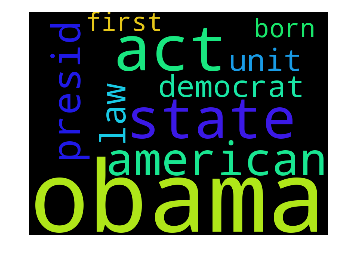

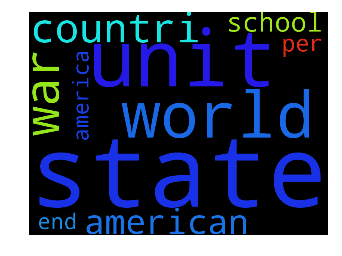

0.35761519801518865

In [21]:
compare_models_and_viz(lda_model_1, lda_model_2, 0.1, 1, 0)